## Climate Change - TSA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime,timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./GlobalLandTemperaturesByState.csv',parse_dates=['dt'],index_col = 'dt')

In [3]:
data.head(5)

,AverageTemperature,AverageTemperatureUncertainty,State,Country
dt,,,,
1855-05-01,25.544,1.171,Acre,Brazil
1855-06-01,24.228,1.103,Acre,Brazil
1855-07-01,24.371,1.044,Acre,Brazil
1855-08-01,25.427,1.073,Acre,Brazil
1855-09-01,25.675,1.014,Acre,Brazil


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 645675 entries, 1855-05-01 to 2013-09-01
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AverageTemperature             620027 non-null  float64
 1   AverageTemperatureUncertainty  620027 non-null  float64
 2   State                          645675 non-null  object 
 3   Country                        645675 non-null  object 
dtypes: float64(2), object(2)
memory usage: 24.6+ MB


In [5]:
data.shape

(645675, 4)

In [6]:
data.isnull().mean()*100

AverageTemperature               3.972277
AverageTemperatureUncertainty    3.972277
State                            0.000000
Country                          0.000000
dtype: float64

In [7]:
data.dropna(inplace=True)

In [8]:
data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


##### Let's create a Year column

In [9]:
data['Year'] = data.index.year
data.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year
dt,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [10]:
data.describe()

,AverageTemperature,AverageTemperatureUncertainty,Year
count,620027.000000,620027.000000,620027.000000
mean,8.993111,1.287647,1902.331598
std,13.772150,1.360392,67.831393
min,-45.389000,0.036000,1743.000000
25%,-0.693000,0.316000,1851.000000
50%,11.199000,0.656000,1906.000000
75%,19.899000,1.850000,1960.000000
max,36.339000,12.646000,2013.000000


##### Let's take a range between 1980 to 2013 to analyze the data

In [11]:
data_new = data.loc['1980':'2013']
data_new

,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year
dt,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980
...,...,...,...,...,...
2013-04-01,15.710,0.461,Zhejiang,China,2013
2013-05-01,21.634,0.578,Zhejiang,China,2013
2013-06-01,24.679,0.596,Zhejiang,China,2013


##### Plotting the average temperature over the years

In [12]:
Temp_over_years = data_new.groupby(['Year'])['AverageTemperature'].mean().reset_index()

In [13]:
Temp_over_years

,Year,AverageTemperature
0,1980,9.689856
1,1981,10.366578
2,1982,9.837958
3,1983,10.259516
4,1984,9.724950
5,1985,9.465436
6,1986,9.914519
7,1987,9.726528
8,1988,10.158058
9,1989,10.293226


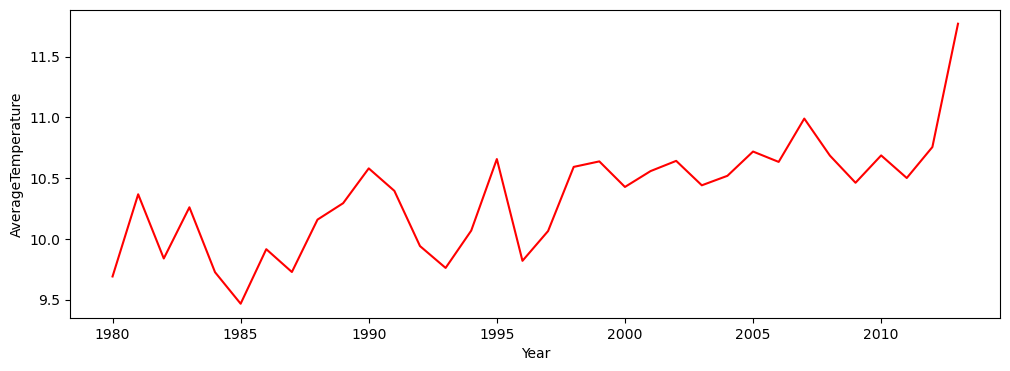

In [14]:
plt.figure(figsize=(12,4))
sns.lineplot(data=Temp_over_years,x='Year',y='AverageTemperature',color = 'red')
plt.show()

The average temperature is increasing over time

#### Resampling the DataFrame for drawing more distinctive line(correct method)

In [15]:
data_resampled = data_new[['AverageTemperature']].resample('A').mean()

In [16]:
data_resampled.head()

,AverageTemperature
dt,
1980-12-31,9.689856
1981-12-31,10.366578
1982-12-31,9.837958
1983-12-31,10.259516
1984-12-31,9.724950


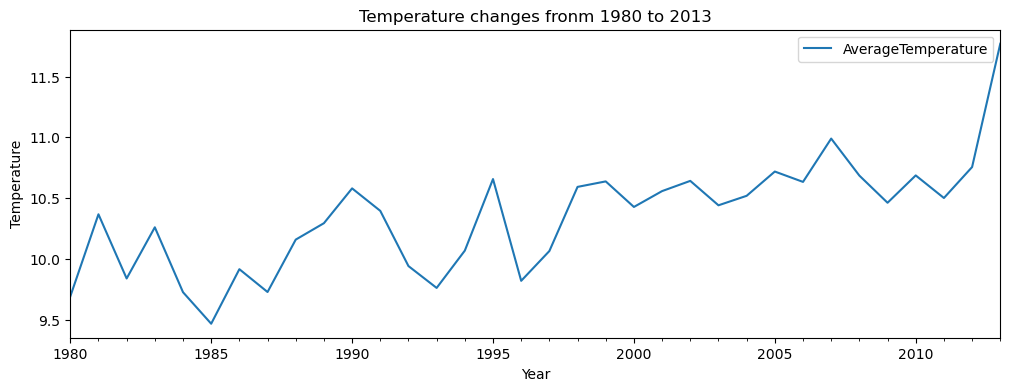

In [17]:
data_resampled.plot(title="Temperature changes fronm 1980 to 2013",figsize=(12,4))
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

Lets now apply Dicky fuller Test

The null Hypothesis is that the Time series is not stationary and is affected by trends

In [18]:
data_adf = adfuller(data_resampled)

In [19]:
data_adf

(-0.7282086836640944,
 0.8393069398295807,
 2,
 31,
 {'1%': -3.661428725118324,
  '5%': -2.960525341210433,
  '10%': -2.6193188033298647},
 21.782091866408557)

#### Test statistic

In [20]:
data_adf[0]

-0.7282086836640944

#### p-value

In [21]:
data_adf[1]

0.8393069398295807

#### CI values

In [22]:
data_adf[4]

{'1%': -3.661428725118324,
 '5%': -2.960525341210433,
 '10%': -2.6193188033298647}

We have failed to reject the null hypothesis

#### Decomposing the TS

In [23]:
data_decompose = seasonal_decompose(data_resampled,period = 3)

In [24]:
trend = data_decompose.trend
seasonal = data_decompose.seasonal
residual = data_decompose.resid

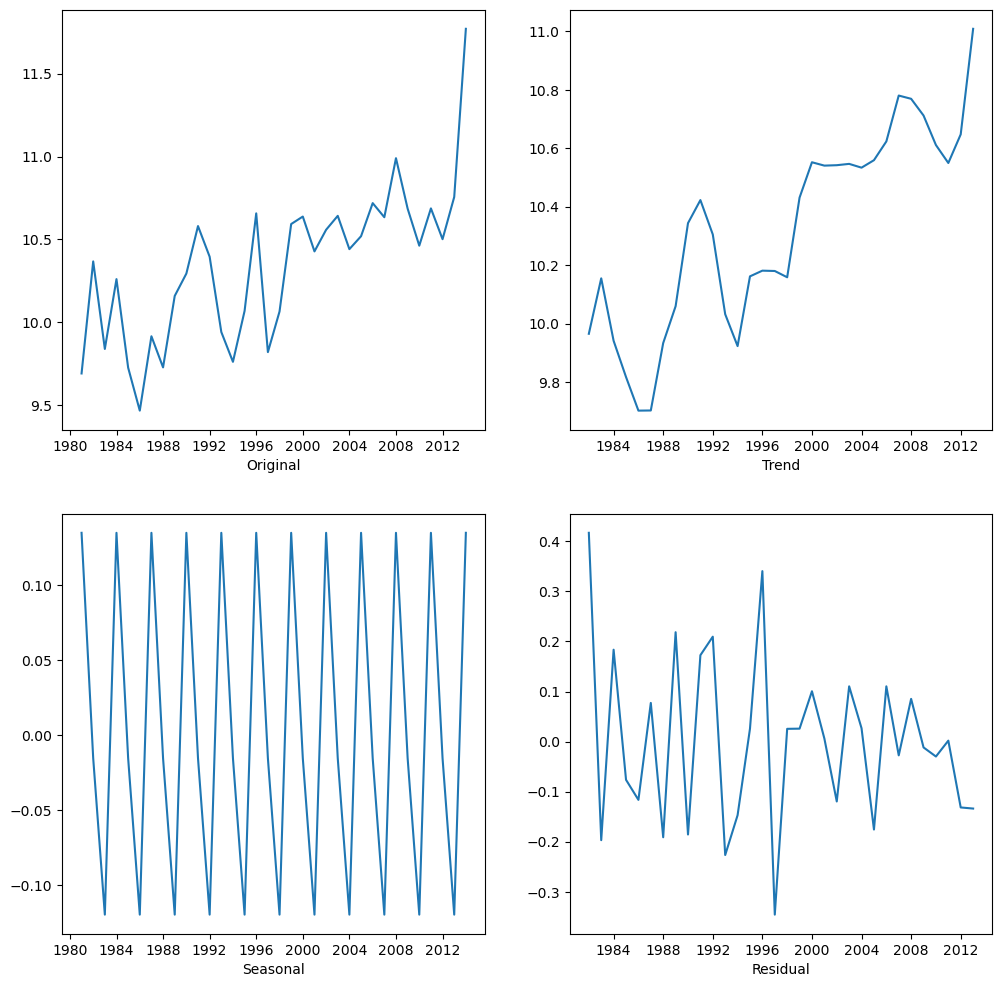

In [25]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(data_resampled)
plt.xlabel('Original')

plt.subplot(2,2,2)
plt.plot(trend)
plt.xlabel('Trend')

plt.subplot(2,2,3)
plt.plot(seasonal)
plt.xlabel('Seasonal')

plt.subplot(2,2,4)
plt.plot(residual)
plt.xlabel('Residual')

plt.show()

#### Transorming the data to make it stationary using differencing

In [26]:
rol_mean = data_resampled.rolling(window = 3,center = True).mean()
rol_std = data_resampled.rolling(window = 3 ,center = True).std()
ewm = data_resampled.ewm(span = 3).mean()

In [27]:
difference_rol_mean = data_resampled - rol_mean

In [28]:
difference_rol_mean

,AverageTemperature
dt,
1980-12-31,NaN
1981-12-31,0.401781
1982-12-31,-0.316726
1983-12-31,0.318708
1984-12-31,-0.091684
1985-12-31,-0.236199
1986-12-31,0.212358
1987-12-31,-0.206507
1988-12-31,0.098788


In [29]:
difference_rol_mean.dropna(inplace=True)

In [30]:
difference_ewm = data_resampled - ewm

In [31]:
difference_ewm.dropna(inplace=True)

In [32]:
difference_rol_std = data_resampled - rol_std

In [33]:
difference_rol_std

,AverageTemperature
dt,
1980-12-31,NaN
1981-12-31,10.010833
1982-12-31,9.558490
1983-12-31,9.977783
1984-12-31,9.320048
1985-12-31,9.239988
1986-12-31,9.688988
1987-12-31,9.510168
1988-12-31,9.862075


In [34]:
difference_rol_std.dropna(inplace=True)

#### ADF test on Rolling difference

In [36]:
data_adf_01 = adfuller(difference_rol_mean)

In [37]:
data_adf_01

(-7.007709911754551,
 7.051586169495728e-10,
 1,
 30,
 {'1%': -3.6699197407407405,
  '5%': -2.9640707407407407,
  '10%': -2.621171111111111},
 -18.868307387256664)

In [ ]:
data_adf_02 = adfuller(difference_rol_std)

In [42]:
data_adf_02

(-4.297445827209393,
 0.0004487582028176382,
 1,
 32,
 {'1%': -3.653519805908203,
  '5%': -2.9572185644531253,
  '10%': -2.6175881640625},
 -14.039508109032148)

#### ADF test on EWM difference

In [40]:
data_adf_03 = adfuller(difference_ewm)

In [41]:
data_adf_03

(-4.297445827209393,
 0.0004487582028176382,
 1,
 32,
 {'1%': -3.653519805908203,
  '5%': -2.9572185644531253,
  '10%': -2.6175881640625},
 -14.039508109032148)